# The HR Analytics Project

**Prepared for FLIP ROBO by Olumide Ikumapayi-DS2306**

# About The HR Attrition Rate Analytics Dataset

**Human resource analytics**

Also known as HR analytics, is a specialized field within the broader realm of analytics. It pertains to the application of analytical processes specifically within the human resource department of an organization. The main objective of HR analytics is to enhance employee performance and ultimately optimize return on investment. This is achieved through a comprehensive approach that involves not only data collection on employee efficiency, but also the analysis of this data to inform decision-making and drive improvements in various HR processes.

**Attrition in HR**

Attrition in human resources, which refers to the gradual loss of employees over time, is a concerning issue for companies. HR professionals play a crucial role in developing compensation programs, work culture, and motivation systems to retain top employees. The impact of attrition on companies will be explored in this discussion, while the use of HR Analytics to analyze attrition will be addressed separately.

**Attrition affecting Companies**

High employee attrition is a significant issue for companies due to its financial impact. The costs associated with job postings, recruitment processes, administrative tasks, and training for new hires are common expenses when employees leave and need to be replaced. Furthermore, frequent turnover hinders the growth of an organization's knowledge and experience over time. This is especially problematic for businesses that interact directly with customers, as customers tend to prefer familiar faces. The presence of new employees increases the likelihood of errors and problems occurring.For more information you can check the link to the dataset:https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics.

The flow of this machine learning exercise is as follows:

1. [Import Necessary Libraries](#Import-Necessary-Libraries)
2. [Importing The HR Analytics Dataset](#Importing-The-HR-Analytics-Dataset)
3. [Exploratory Data Analysis(EDA) & Visualization](#Exploratory-Data-Analysis-(EDA)-&-Visualization))
4. [Description-of-Dataset](#Description-of-Dataset)
5. [Feature Engineering And Data Preprocessing](#Feature-Engineering-And-Data-Preprocessing)
6. [The Machine Learning Model Training Evaluation and Predictions](#The-Machine-Learning-Model-Training-Evaluation-and-Predictions)
  *  i.  [Random Forest Classifier](#Random-Forest-Classifier)
  *  ii. [ExtraTreesClassifier](#Extra-Trees-Classifier)
  *  iii.[Logistic Regression](#Logistic-Regression)
  *  iv. [Decision Tree Classifier](#Decision-Tree-Classifier)
  *  v.  [K-Neighbors Classifier](#K-Neighbors-Classifier)
  *  vi. [Gradient Boosting Classifier](#Gradient-Boosting-Classifier)
  *  vii.[Support Vector Machine(SVC) Classifier](#support-Vector-Machine-(SVC)-Classifier)
 
 
 7. [Cross Validation Score](#Cross-Validation-Score)
 8. [Hyper Parameter Tuning](#Hyper-Parameter-Tuning)
 9. [Saving the Model](#Saving-the-Model)

# Import Necessary Libraries

Importing all necessary libraries for data manipulation, visualization, and machine learning(ML).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import io
import requests
%matplotlib inline
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings('ignore')
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve, roc_auc_score

# Importing The HR Analytics Dataset

In [2]:
url = 'https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics/raw/master/ibm-hr-analytics-employee-attrition-performance.zip'
ibm_hr_analytics = pd.read_csv(url)

In [3]:
df = pd.read_csv('https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics/raw/master/ibm-hr-analytics-employee-attrition-performance.zip')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [4]:
df.head(15)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [5]:
df.tail(30)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1440,36,No,Travel_Frequently,688,Research & Development,4,2,Life Sciences,1,2025,4,Female,97,3,2,Manufacturing Director,2,Divorced,5131,9192,7,Y,No,13,3,2,80,3,18,3,3,4,2,0,2
1441,56,No,Non-Travel,667,Research & Development,1,4,Life Sciences,1,2026,3,Male,57,3,2,Healthcare Representative,3,Divorced,6306,26236,1,Y,No,21,4,1,80,1,13,2,2,13,12,1,9
1442,29,Yes,Travel_Rarely,1092,Research & Development,1,4,Medical,1,2027,1,Male,36,3,1,Research Scientist,4,Married,4787,26124,9,Y,Yes,14,3,2,80,3,4,3,4,2,2,2,2
1443,42,No,Travel_Rarely,300,Research & Development,2,3,Life Sciences,1,2031,1,Male,56,3,5,Manager,3,Married,18880,17312,5,Y,No,11,3,1,80,0,24,2,2,22,6,4,14
1444,56,Yes,Travel_Rarely,310,Research & Development,7,2,Technical Degree,1,2032,4,Male,72,3,1,Laboratory Technician,3,Married,2339,3666,8,Y,No,11,3,4,80,1,14,4,1,10,9,9,8
1445,41,No,Travel_Rarely,582,Research & Development,28,4,Life Sciences,1,2034,1,Female,60,2,4,Manufacturing Director,2,Married,13570,5640,0,Y,No,23,4,3,80,1,21,3,3,20,7,0,10
1446,34,No,Travel_Rarely,704,Sales,28,3,Marketing,1,2035,4,Female,95,2,2,Sales Executive,3,Married,6712,8978,1,Y,No,21,4,4,80,2,8,2,3,8,7,1,7
1447,36,No,Non-Travel,301,Sales,15,4,Marketing,1,2036,4,Male,88,1,2,Sales Executive,4,Divorced,5406,10436,1,Y,No,24,4,1,80,1,15,4,2,15,12,11,11
1448,41,No,Travel_Rarely,930,Sales,3,3,Life Sciences,1,2037,3,Male,57,2,2,Sales Executive,2,Divorced,8938,12227,2,Y,No,11,3,3,80,1,14,5,3,5,4,0,4
1449,32,No,Travel_Rarely,529,Research & Development,2,3,Technical Degree,1,2038,4,Male,78,3,1,Research Scientist,1,Single,2439,11288,1,Y,No,14,3,4,80,0,4,4,3,4,2,1,2


In [6]:
# Displaying the first few rows of the dataset
ibm_hr_analytics.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Exploratory Data Analysis(EDA) & Visualization

Exploring the dataset in order to gain insights by Checking for missing values, summary statistics, and visualize the data.

In [7]:
#Checking the dimension of the dataset
df.shape

(1470, 35)

This dataset consists of 1470 rows and 35 columns. Among these columns, one is specified as the target variable, while the other 34 columns function as independent variables.

**HR Analytics Project Description:**

**Project Aims & Objective**

The objective of the HR Analytics project is to conduct an analysis and gain a comprehensive understanding of employee attrition occurring within an organization. Employee attrition denotes the gradual decrease in the number of employees over a period of time. The project seeks to reveal valuable insights and identify factors that contribute to attrition, ultimately aiding the organization in making informed decisions based on data to mitigate attrition rates.

**Features (Independent Variables):**
* **Age**: The age of the employee.
* **Business Travel**: The frequency and type of business travel (e.g., Travel Frequently, Rarely, Non-Travel).
* **Daily Rate**: The daily rate of pay.
* **Department**: The department in which the employee works (e.g., Sales, Research & Development, Human Resources).
* **Distance From Home**: The distance of the employee's home from the workplace.
* **Education**: The level of education achieved by the employee (ranging from 1 to 5).
* **Environment Satisfaction**: Employee's satisfaction with the work environment (ranging from 1 to 4).
* **Gender**: Employee's gender (Male or Female).
* **Job Involvement**: Employee's level of job involvement (ranging from 1 to 4).
* **Job Level**: The job level of the employee within the organization.
* **Job Role**: The specific role or position of the employee.
* **Job Satisfaction**: Employee's job satisfaction level (ranging from 1 to 4).
* **Marital Status**: The marital status of the employee (e.g., Single, Married, Divorced).
* **Monthly Income**: The monthly income of the employee.
* **Num Companies Worked**: The number of companies the employee has worked for.
* **Over Time**: Whether the employee works overtime (Yes or No).
* **Relationship Satisfaction**: Employee's satisfaction with relationships at work (ranging from 1 to 4).
* **Stock Option Level**: The level of stock options available to the employee.
* **Total Working Years**: The total number of years the employee has worked.
* **Training Times Last Year**: The number of training programs the employee attended last year.
* **Work-Life Balance**: Employee's perception of work-life balance (ranging from 1 to 4).
* **Years at Company**: The number of years the employee has worked at the current company.
* **Years in Current Role**: The number of years the employee has been in their current role.
* **Years Since Last Promotion**: The number of years since the employee's last promotion.
* **Years with Current Manager**: The number of years the employee has had their current manager.

**Output (Dependent Variable - Target Variable):**
- **Attrition**: This is the target variable. It indicates whether an employee has experienced attrition (left the organization) or not. It can take one of two values: "Yes" (attrition occurred) or "No" (no attrition occurred).

The project will involve analyzing how these independent variables influence the dependent variable (Attrition) and creating a predictive model to understand and possibly mitigate attrition within the organization.

In [8]:
#checking the null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no missing values in the Datasets

In [9]:
df.isnull().sum().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are no null values observed in the dataset. 

<AxesSubplot:>

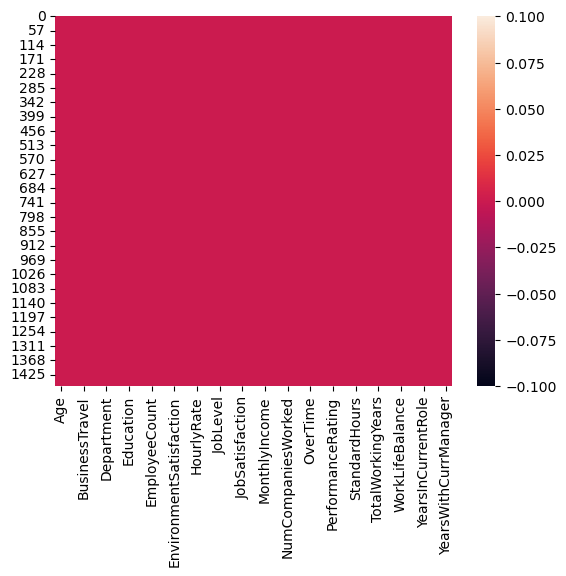

In [11]:
#Lets visualize it using heatmap
sns.heatmap(df.isnull())

In [12]:
# Checking the columns of dataset
df.columns.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [13]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [14]:
# checking the types of columns
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

The dataset contains two(2) distinct data types: int64 and object.

In [15]:
# Separating numerical and categorical columns

#checking for categorical columns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        categorical_col.append(i)
print("categorical columns:", categorical_col)
print("\n")

#Checking for Numerical column
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!= "object":
        numerical_col.append(i)
print("numerical columns:", numerical_col)

categorical columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


numerical columns: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [16]:
# Checking number of unique values in each column
df.nunique().to_frame("No.of unique values")

,No.of unique values
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


Three columns ('EmployeeCount,' 'Over18,' and 'StandardHours') were observed to exhibit a consistent value of "1" across all 1470 rows. Additionally, 'EmployeeNumber' serves as a unique identifier for all 1470 rows. These four columns will be excluded from consideration as they lack predictive value in assessing attrition. This elimination will facilitate the proper use of categorical variables in our modeling process.

In [17]:
# Dropping all four columns
columns_to_drop = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']
df = df.drop(columns=columns_to_drop)

In [18]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [19]:
# Checking the list of counts of target
df["Attrition"].unique()

array(['Yes', 'No'], dtype=object)

The target column contains two distinct categories, specifically labeled as "Yes" and "No."

Remember,"Yes" is for when attrition occurred and "No" is when no attrition occurred.

# Description of Dataset

In [20]:
# Summary statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [21]:
# checking again the statistical distribution for numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0


**Univariate analysis**

No     1233
Yes     237
Name: Attrition, dtype: int64


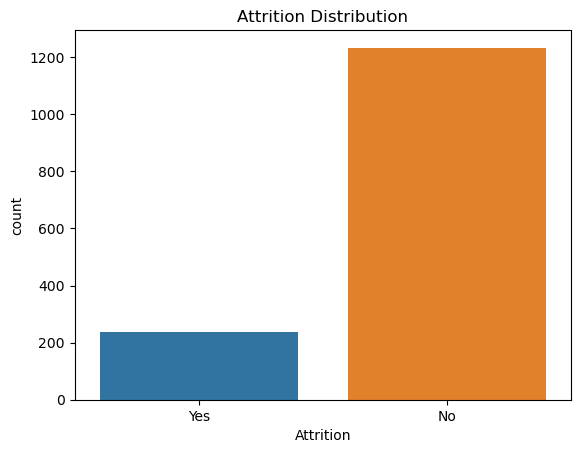

In [22]:
# Visualizing the number of Attrition and checking for imbalance
plt.title('Attrition Distribution')
ax = sns.countplot(x='Attrition', data=df)
print(df['Attrition'].value_counts())

As anticipated, the 'Attrition' column exhibits a notable disparity in class distribution, with 1233 instances labeled as 'No' and 237 as 'Yes.' It is imperative to rectify this IMBALANCE before initiating model training to avoid undue emphasis on the 'No' class, particularly given that our study focuses on employees who experience attrition ('Yes').

In order to address this issue of IMBALANCE, we will employ the oversampling method in the subsequent phase.

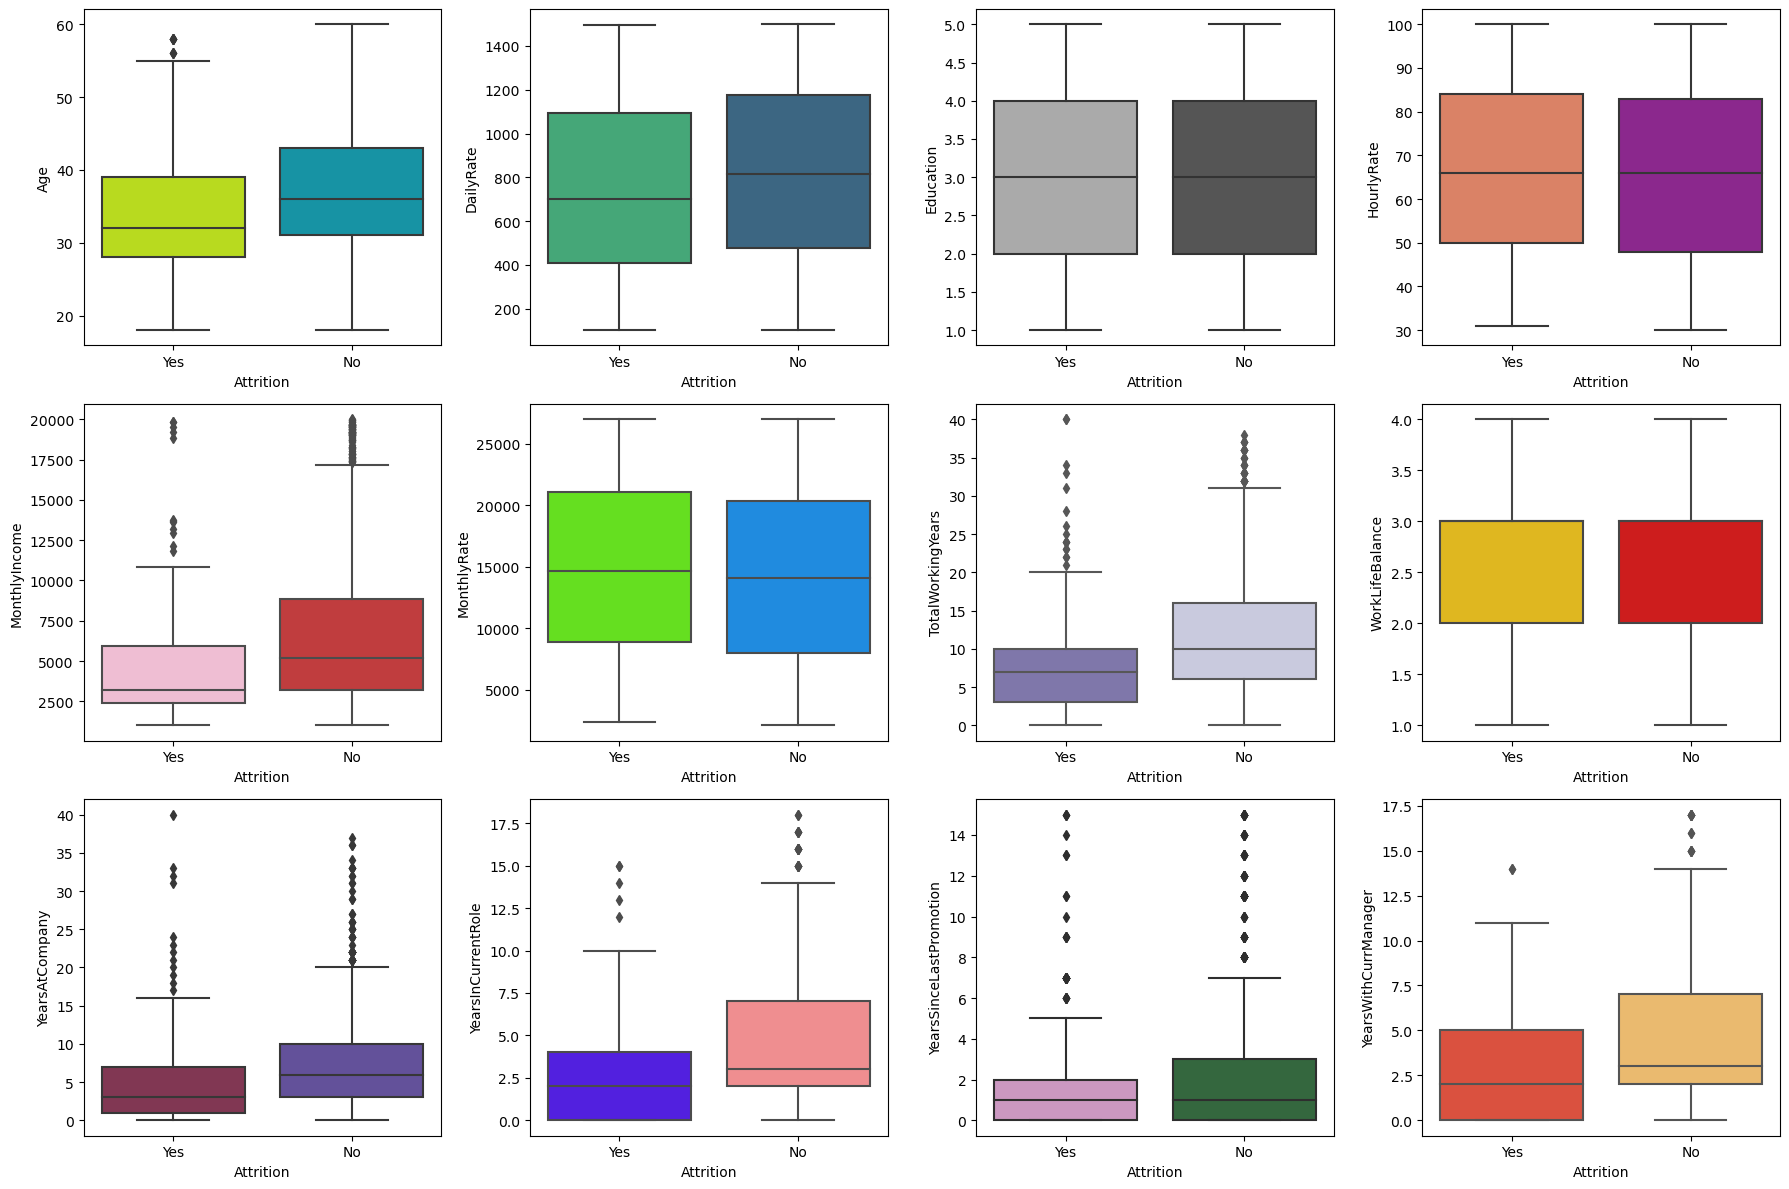

In [23]:
# visualizing some of the Numerical features
fig, axss = plt.subplots(3,4, figsize=[18,12])
sns.boxplot(x='Attrition', y ='Age', data=df, ax=axss[0][0],palette="nipy_spectral_r")
sns.boxplot(x='Attrition', y ='DailyRate', data=df, ax=axss[0][1],palette="viridis_r")
sns.boxplot(x='Attrition', y ='Education', data=df, ax=axss[0][2],palette="gist_gray_r")
sns.boxplot(x='Attrition', y ='HourlyRate', data=df, ax=axss[0][3],palette="plasma_r")
sns.boxplot(x='Attrition', y ='MonthlyIncome', data=df, ax=axss[1][0],palette="tab20_r")
sns.boxplot(x='Attrition', y ='MonthlyRate', data=df, ax=axss[1][1],palette="gist_rainbow")
sns.boxplot(x='Attrition', y ='TotalWorkingYears', data=df, ax=axss[1][2],palette="Purples_r")
sns.boxplot(x='Attrition', y ='WorkLifeBalance', data=df, ax=axss[1][3],palette="hot_r")
sns.boxplot(x='Attrition', y ='YearsAtCompany', data=df, ax=axss[2][0],palette="twilight_r")
sns.boxplot(x='Attrition', y ='YearsInCurrentRole', data=df, ax=axss[2][1],palette="gnuplot2")
sns.boxplot(x='Attrition', y ='YearsSinceLastPromotion', data=df, ax=axss[2][2],palette="cubehelix_r")
sns.boxplot(x='Attrition', y ='YearsWithCurrManager', data=df, ax=axss[2][3],palette="YlOrRd_r")
plt.tight_layout()
plt.savefig('numerical_dist.png');

**Visualizing for Non-numerical(Categorical) Features**

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


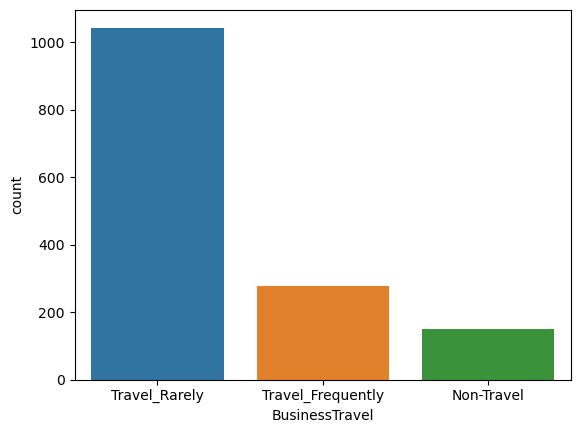

In [24]:
# Visualizing the count of BusinessTravel
print(df['BusinessTravel'].value_counts())
ax = sns.countplot(x='BusinessTravel', data=df)
plt.show()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


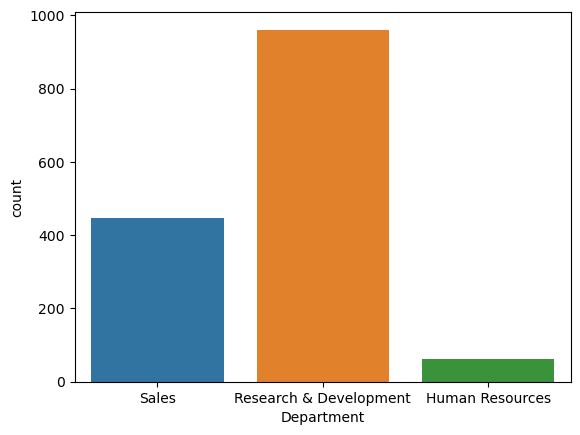

In [25]:
# Visualizing the count of Department
print(df['Department'].value_counts())
ax = sns.countplot(x='Department', data=df)
plt.show()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


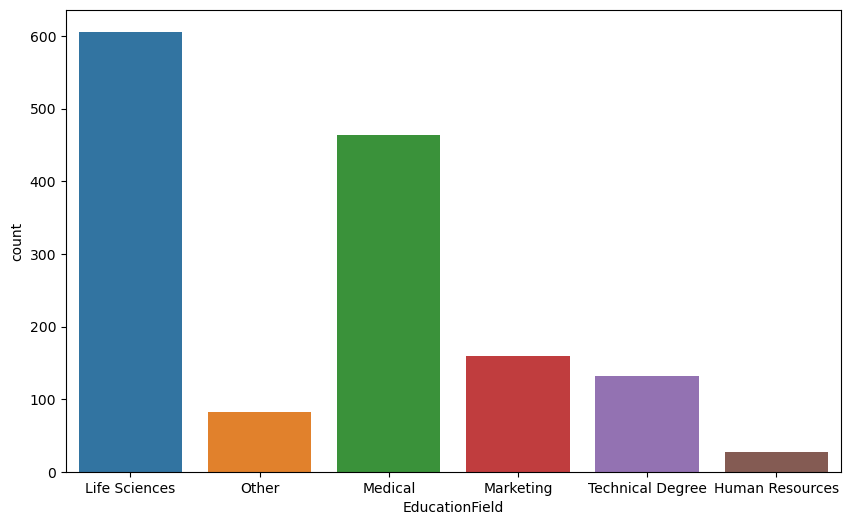

In [26]:
# Visualizing the count of Education Field
plt.figure(figsize=(10, 6))
print(df['EducationField'].value_counts())
ax = sns.countplot(x='EducationField', data=df)
plt.show()

Male      882
Female    588
Name: Gender, dtype: int64


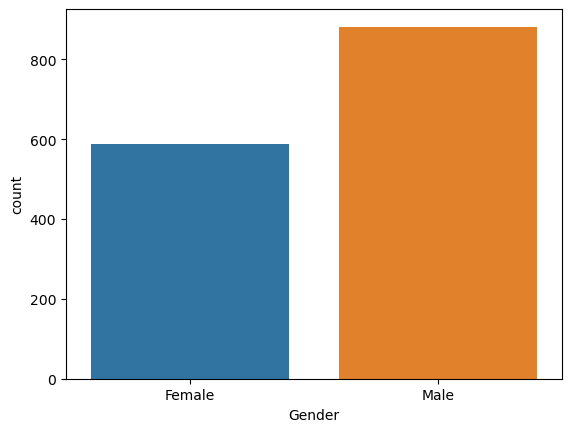

In [27]:
# Visualizing the count of Gender
print(df['Gender'].value_counts())
ax = sns.countplot(x='Gender', data=df)
plt.show()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


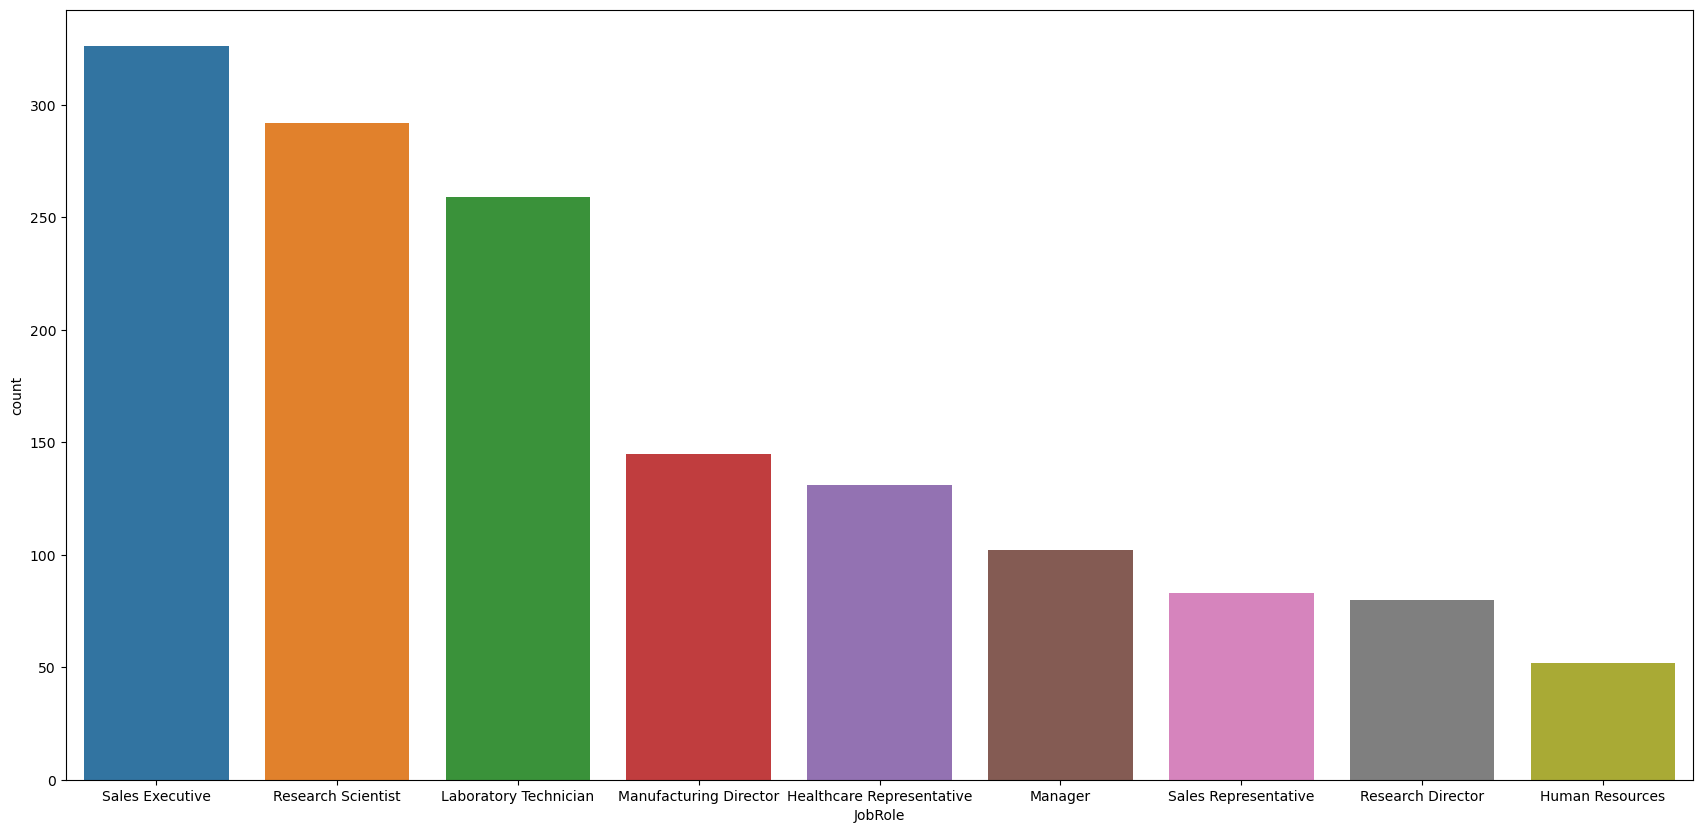

In [28]:
# Visualizing the count of Job role
plt.figure(figsize=(21, 10))
print(df['JobRole'].value_counts())
ax = sns.countplot(x='JobRole', data=df)
plt.show()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


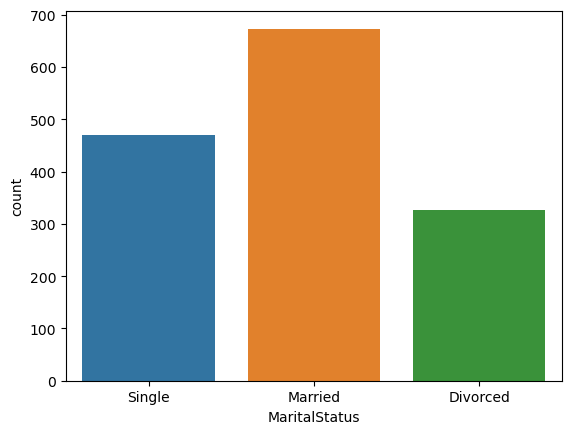

In [29]:
# Visualizing the count of Marital Status
print(df['MaritalStatus'].value_counts())
ax = sns.countplot(x='MaritalStatus', data=df)
plt.show()

No     1054
Yes     416
Name: OverTime, dtype: int64


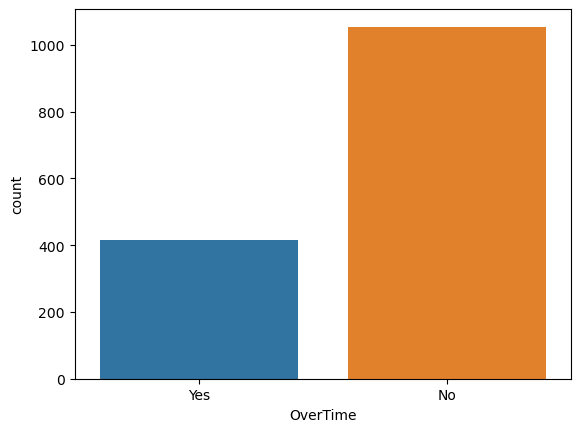

In [30]:
# Visualizing the count of Overtime
print(df['OverTime'].value_counts())
ax = sns.countplot(x='OverTime', data=df)
plt.show()

# Feature Engineering And Data Preprocessing

**Encoding Categorical Columns**

In [31]:
# Encoding Categorical Columns using OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,2,0.0,94,3,2,7.0,4,2.0,5993,19479,8,1.0,11,3,1,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,3,1.0,61,2,2,6.0,2,1.0,5130,24907,1,0.0,23,4,4,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,4,1.0,92,2,1,2.0,3,2.0,2090,2396,6,1.0,15,3,2,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,4,0.0,56,3,1,6.0,3,1.0,2909,23159,1,1.0,11,3,3,0,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,1,1.0,40,3,1,2.0,2,1.0,3468,16632,9,0.0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.0,1.0,884,1.0,23,2,3.0,3,1.0,41,4,2,2.0,4,1.0,2571,12290,4,0.0,17,3,3,1,17,3,3,5,2,0,3
1466,39,0.0,2.0,613,1.0,6,1,3.0,4,1.0,42,2,3,0.0,1,1.0,9991,21457,4,0.0,15,3,1,1,9,5,3,7,7,1,7
1467,27,0.0,2.0,155,1.0,4,3,1.0,2,1.0,87,4,2,4.0,2,1.0,6142,5174,1,1.0,20,4,2,1,6,0,3,6,2,0,3
1468,49,0.0,1.0,1023,2.0,2,3,3.0,4,1.0,63,2,2,7.0,2,1.0,5390,13243,2,0.0,14,3,4,0,17,3,2,9,6,0,8


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   float64
 2   BusinessTravel            1470 non-null   float64
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   float64
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   float64
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   float64
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   int64  
 13  JobRole                   1470 non-null   float64
 14  JobSatis

The categorical columns were transformed into numerical columns through the use of the Ordinal Encoding method.

In [33]:
# Statistical Summary of numerical
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,2.721769,0.600000,65.891156,2.729932,2.063946,4.458503,2.728571,1.097279,6502.931293,14313.103401,2.693197,0.282993,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,20.329428,0.711561,1.106940,2.461821,1.102846,0.730121,4707.956783,7117.786044,2.498009,0.450606,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,30.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1009.000000,2094.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,48.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2911.000000,8047.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,66.000000,3.000000,2.000000,5.000000,3.000000,1.000000,4919.000000,14235.500000,2.000000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,83.750000,3.000000,3.000000,7.000000,4.000000,2.000000,8379.000000,20461.500000,4.000000,1.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,100.000000,4.000000,5.000000,8.000000,4.000000,2.000000,19999.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


After performing the encoding process on the categorical columns, we are able to observe the complete details of each column. It is evident that all the columns display an equal count, indicating the absence of null values in the dataset. The describe method provides information regarding the count, mean, standard deviation, minimum value, interquartile range, and maximum value for all columns.

**Correlation between Target variable and Independent Variables**.

In [34]:
# Checking the correlation between features and the target.
cor = df.corr()
cor

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,0.024287,0.029820,0.509604,-0.122427,-0.004892,-0.095029,0.497855,0.028051,0.299635,0.028062,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,0.067151,-0.103481,0.162070,-0.159840,0.015170,0.043494,0.246118,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,0.026528,0.039062,0.019311,0.002724,-0.033962,0.024001,0.034319,-0.014107,0.020875,0.016543,-0.029377,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,0.023381,0.046135,0.002966,-0.009472,0.030571,-0.069586,0.007707,-0.032182,0.038153,0.009135,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,-0.004144,-0.024586,0.101963,0.662431,0.021001,0.056073,0.053130,0.023642,-0.035882,0.007481,-0.007840,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,0.031131,0.008783,0.005303,-0.001015,-0.003669,-0.014437,-0.017014,0.027473,-0.029251,0.025514,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,0.016775,0.042438,0.101589,0.004236,-0.011296,0.004053,0.094961,-0.026084,0.126317,-0.020322,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,-0.021941,-0.002655,-0.044933,0.015599,-0.034401,0.014420,-0.041070,-0.027182,-0.008663,0.002259,-0.011214,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,-0.049857,-0.008278,0.001212,-0.017321,-0.006784,-0.003593,-0.006259,0.037600,0.012594,0.070132,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,-0.000478,0.017960,-0.039403,-0.039723,0.033252,-0.047183,-0.031858,-0.041482,-0.039147,-0.041924,0.002733,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


The correlation between the dependent and independent variables can be determined, and this relationship can be visually represented through the use of a heatmap plot.

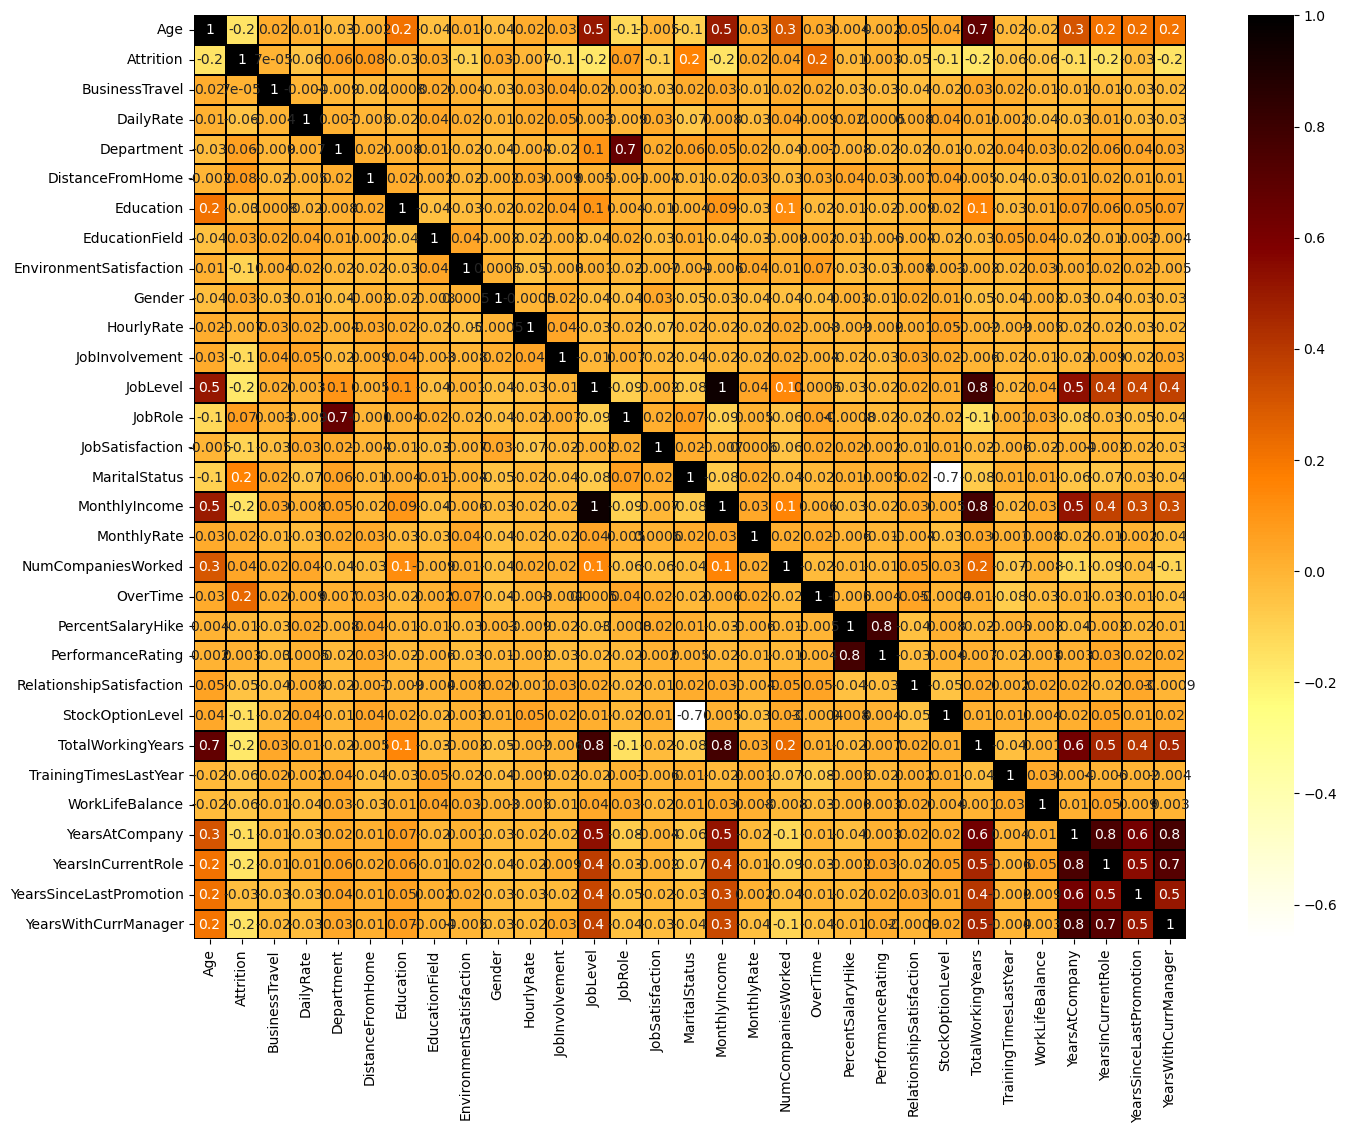

In [35]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize = (16, 12))
sns.heatmap(df.corr(), linewidths = 0.1, fmt = ".1g", linecolor = "black", annot = True, cmap = "afmhot_r")
plt.yticks(rotation = 0);
plt.show()

In [36]:
cor['Attrition'].sort_values(ascending = False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
M

Here we are able to observe where the features are positively and negatively correlated with the target variable.

**Visualizing the correlation between label and features using bar plot**

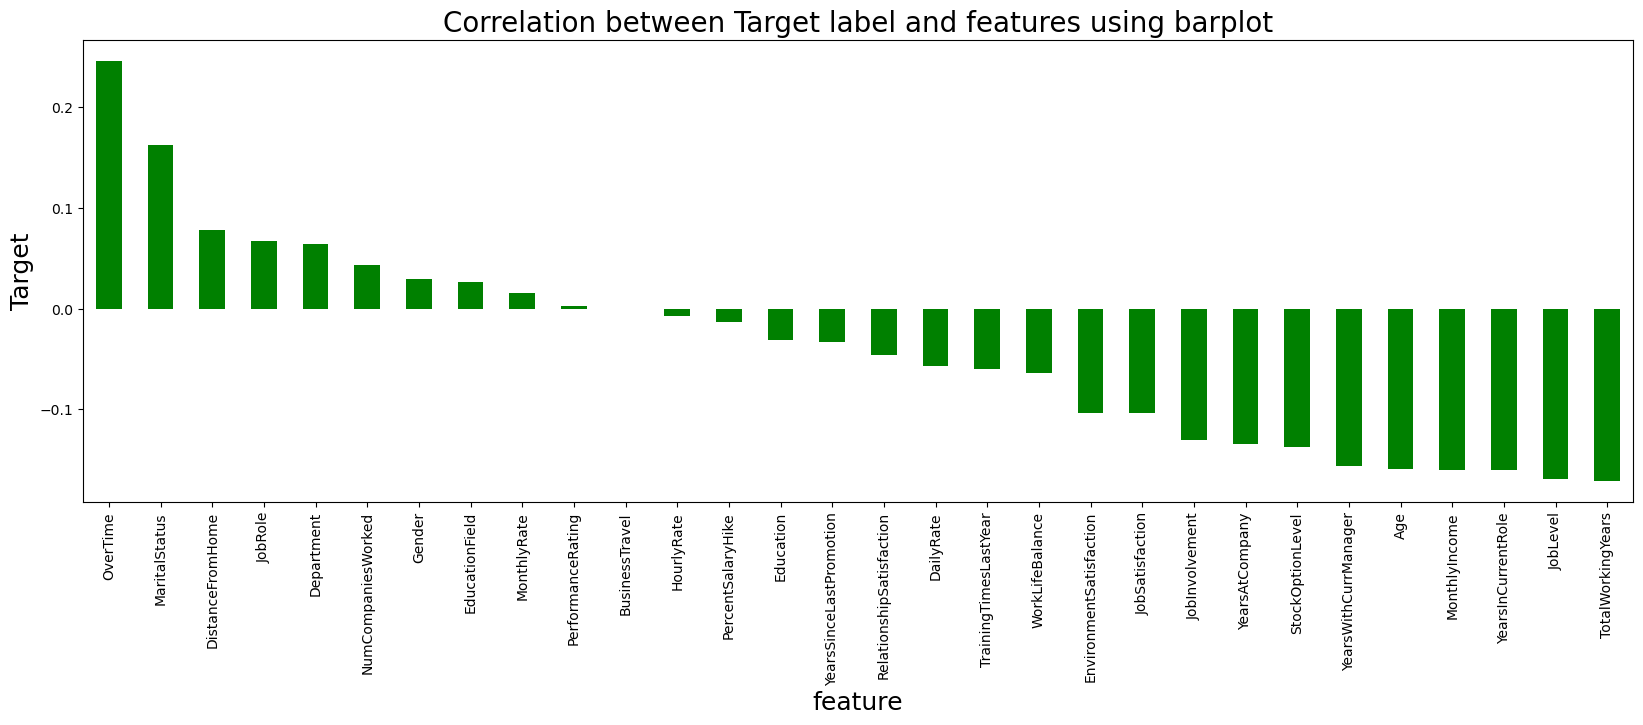

In [37]:
plt.figure(figsize = (20, 6))
df.corr()['Attrition'].sort_values(ascending = False).drop(['Attrition']).plot(kind='bar',color="g")
plt.xlabel('feature', fontsize = 18)
plt.ylabel('Target', fontsize = 18)
plt.title("Correlation between Target label and features using barplot", fontsize=20)
plt.show()

The bar plot above illustrates the presence of both positive and negative correlations between the features and the target variable. Specifically, the feature "Business Travel" shows no correlation, whereas "Performance Rating" and "Hourly Rate" exhibit a weak correlation with the target column.

**Separating Features and Target label**

In [38]:
x = df.drop("Attrition", axis =1)
y = df["Attrition"]

**Feature Scaling using standard scalarization**

In [39]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
x = pd.DataFrame(Scaler.fit_transform(x), columns = x.columns)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.590048,0.742527,1.401512,-1.010909,-0.891688,-0.937414,-0.660531,-1.224745,1.383138,0.379672,-0.057788,1.032716,1.153254,1.236820,-0.108350,0.726020,2.125136,1.591746,-1.150554,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-0.913194,-1.297775,-0.493817,-0.147150,-1.868426,-0.937414,0.254625,0.816497,-0.240677,-1.026167,-0.057788,0.626374,-0.660853,-0.133282,-0.291719,1.488876,-0.678049,-0.628241,2.129306,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,0.590048,1.414363,-0.493817,-0.887515,-0.891688,1.316673,1.169781,0.816497,1.284725,-1.026167,-0.961486,-0.998992,0.246200,1.236820,-0.937654,-1.674841,1.324226,1.591746,-0.057267,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,-0.913194,1.461466,-0.493817,-0.764121,1.061787,-0.937414,1.169781,-1.224745,-0.486709,0.379672,-0.961486,0.626374,0.246200,-0.133282,-0.763634,1.243211,-0.678049,1.591746,-1.150554,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0.590048,-0.524295,-0.493817,-0.887515,-1.868426,0.565311,-1.575686,0.816497,-1.274014,0.379672,-0.961486,-0.998992,-0.660853,-0.133282,-0.644858,0.325900,2.525591,-0.628241,-0.877232,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,-0.913194,0.202082,-0.493817,1.703764,-0.891688,0.565311,0.254625,0.816497,-1.224807,1.785511,-0.057788,-0.998992,1.153254,-0.133282,-0.835451,-0.284329,0.523316,-0.628241,0.489376,-0.426230,0.266233,0.241988,0.735447,0.155707,0.338096,-0.327893,-0.615492,-0.679146,-0.314873
1466,0.227347,0.590048,-0.469754,-0.493817,-0.393938,-1.868426,0.565311,1.169781,0.816497,-1.175601,-1.026167,0.845911,-1.811675,-1.567907,-0.133282,0.741140,1.004010,0.523316,-0.628241,-0.057267,-0.426230,-1.584178,0.241988,-0.293077,1.707500,0.338096,-0.001333,0.764998,-0.368715,0.806541
1467,-1.086676,0.590048,-1.605183,-0.493817,-0.640727,0.085049,-0.937414,-0.660531,0.816497,1.038693,1.785511,-0.057788,-0.186309,-0.660853,-0.133282,-0.076690,-1.284418,-0.678049,1.591746,1.309341,2.346151,-0.658973,0.241988,-0.678774,-2.171982,0.338096,-0.164613,-0.615492,-0.679146,-0.314873
1468,1.322365,-0.913194,0.546677,1.401512,-0.887515,0.085049,0.565311,1.169781,0.816497,-0.142264,-1.026167,-0.057788,1.032716,-0.660853,-0.133282,-0.236474,-0.150393,-0.277594,-0.628241,-0.330589,-0.426230,1.191438,-0.932014,0.735447,0.155707,-1.077862,0.325228,0.488900,-0.679146,1.086895


In order to address the problem of bias, we employed the Standard Scalarization method to rescale the data.

**Checking Variance Inflation Factor(VIF)**

In [40]:
# Determining the variance inflation factor in each scaled column i.e.x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif["features"] = x.columns

vif

,VIF values,features
0,2.054172,Age
1,1.016413,BusinessTravel
2,1.023990,DailyRate
3,1.942150,Department
4,1.017135,DistanceFromHome
5,1.063531,Education
6,1.016236,EducationField
7,1.017516,EnvironmentSatisfaction
8,1.019383,Gender
9,1.021142,HourlyRate


The issue of multicolinearity has been resolved, enabling us to proceed with model development.

In [41]:
y.value_counts()

0.0    1233
1.0     237
Name: Attrition, dtype: int64

In this analysis, it is evident that the dataset is imbalanced. Given that this is a classification problem, we will address the imbalance by employing the oversampling technique.

**Oversampling**

In [42]:
# Oversampling the data 
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x, y)

In [43]:
# checking for the value count of target column
y.value_counts()

0.0    1233
1.0     237
Name: Attrition, dtype: int64

In [44]:
y1.value_counts()

1.0    1233
0.0    1233
Name: Attrition, dtype: int64

After achieving a balanced dataset, we can now proceed with the construction of machine learning classification models.

# The Machine Learning Model Training,Evaluation and Predictions

**Finding the best random state**

In [45]:
maxAccu = 0
maxRs = 0
for i in range(1, 300):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = i)
    rfc = RandomForestClassifier()
    rfc.fit(x_train, y_train)
    pred = rfc.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRs = i
print("Best accuracy is", maxAccu, "at random_state", maxRs)

Best accuracy is 0.9621621621621622 at random_state 139


#### SPLIT INTO TRAIN AND TEST USING THE 70:30 RULE

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = maxRs)

## PREPARE THE ROC_AUC CURVE

Define a function for plotting the ROC_AUC curve, which would be used later to see the performance of the classification ML models.

In [47]:
# Function for plotting ROC_AUC curve

def plot_roc_auc(y_test, preds):
    '''
    Takes actual and predicted(probabilities) as input and plots the Receiver
    Operating Characteristic (ROC) curve
    '''
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'darkorange', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'navy')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

**RandomForestClassifier**

accuracy_score: 
 0.9513513513513514
Classification Report for Random Forest Classifier: 
               precision    recall  f1-score   support

         0.0       0.94      0.97      0.95       385
         1.0       0.97      0.93      0.95       355

    accuracy                           0.95       740
   macro avg       0.95      0.95      0.95       740
weighted avg       0.95      0.95      0.95       740

Confusion Matrix of Random Forest Classifier: 
 [[375  10]
 [ 26 329]]


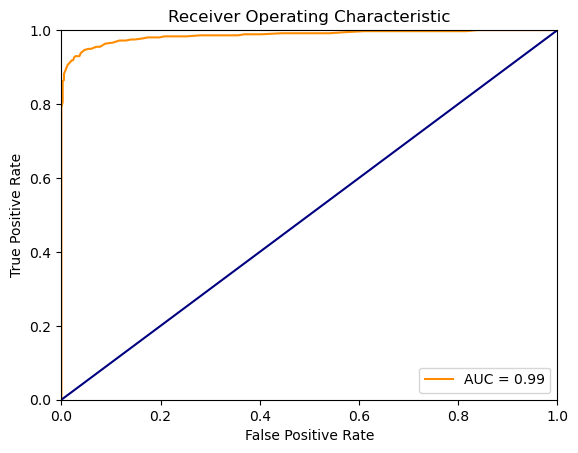

In [48]:
# Checking the accuracy for RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
predrfc = rfc.predict(x_test)
print("accuracy_score: \n", accuracy_score(y_test, predrfc))
print("Classification Report for Random Forest Classifier: \n", classification_report(y_test, predrfc))
print("Confusion Matrix of Random Forest Classifier: \n", confusion_matrix(y_test, predrfc))
plot_roc_auc(y_test, rfc.predict_proba(x_test)[:,1])

**ExtraTreesClassifier**

accuracy_score: 
 0.9716216216216216
Classification Report for ExtraTree Classifier: 
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       385
         1.0       0.97      0.97      0.97       355

    accuracy                           0.97       740
   macro avg       0.97      0.97      0.97       740
weighted avg       0.97      0.97      0.97       740

Confusion Matrix of ExtraTree Classifier: 
 [[376   9]
 [ 12 343]]


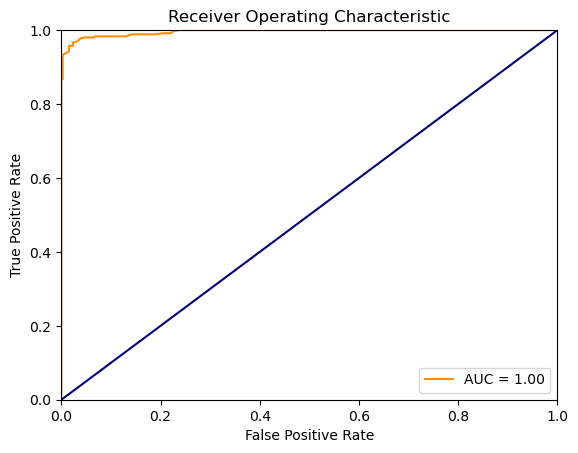

In [49]:
# Checking for accuracy for ExtraTree Classifier
Et = ExtraTreesClassifier()
Et.fit(x_train, y_train)
predEt = Et.predict(x_test)
print("accuracy_score: \n", accuracy_score(y_test, predEt))
print("Classification Report for ExtraTree Classifier: \n", classification_report(y_test, predEt))
print("Confusion Matrix of ExtraTree Classifier: \n", confusion_matrix(y_test, predEt))
plot_roc_auc(y_test, Et.predict_proba(x_test)[:,1])

**Logistic Regression**

accuracy_score: 
 0.7716216216216216
Classification Report for Logistic Regression: 
               precision    recall  f1-score   support

         0.0       0.80      0.75      0.77       385
         1.0       0.75      0.79      0.77       355

    accuracy                           0.77       740
   macro avg       0.77      0.77      0.77       740
weighted avg       0.77      0.77      0.77       740

Confusion Matrix of Logistic Regression: 
 [[290  95]
 [ 74 281]]


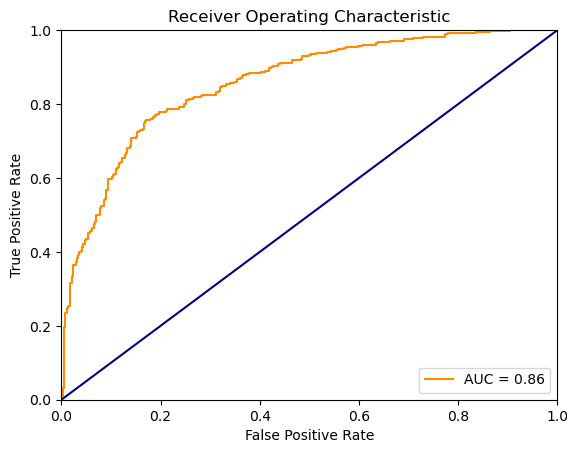

In [50]:
# Checking accuracy for Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)
predlr = lr.predict(x_test)
print("accuracy_score: \n", accuracy_score(y_test, predlr))
print("Classification Report for Logistic Regression: \n", classification_report(y_test, predlr))
print("Confusion Matrix of Logistic Regression: \n", confusion_matrix(y_test, predlr))
plot_roc_auc(y_test, lr.predict_proba(x_test)[:,1])

**Decision Tree Classifier**

accuracy_score: 
 0.8216216216216217
Classification Report for Decision Tree Classifier: 
               precision    recall  f1-score   support

         0.0       0.84      0.81      0.82       385
         1.0       0.80      0.84      0.82       355

    accuracy                           0.82       740
   macro avg       0.82      0.82      0.82       740
weighted avg       0.82      0.82      0.82       740

Confusion Matrix of Decision Tree Classifier: 
 [[310  75]
 [ 57 298]]


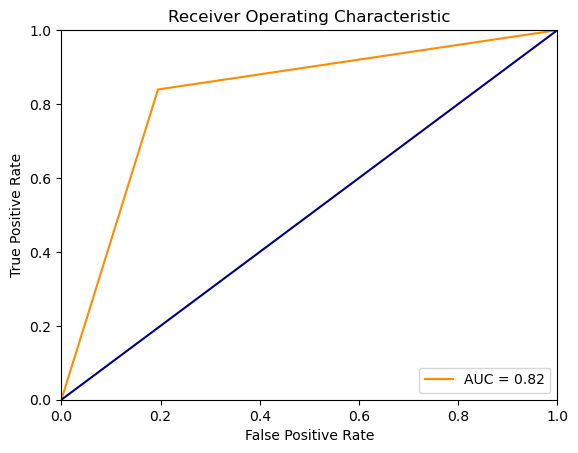

In [51]:
# Checking accuracy for Decision Tree Classifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
preddtree = dtree.predict(x_test)
print("accuracy_score: \n", accuracy_score(y_test, preddtree))
print("Classification Report for Decision Tree Classifier: \n", classification_report(y_test, preddtree))
print("Confusion Matrix of Decision Tree Classifier: \n", confusion_matrix(y_test, preddtree))
plot_roc_auc(y_test, dtree.predict_proba(x_test)[:,1])

**K-Neighbors Classifier**

accuracy_score: 
 0.8891891891891892
Classification Report for K-Neighbors Classifier: 
               precision    recall  f1-score   support

         0.0       0.97      0.81      0.88       385
         1.0       0.83      0.97      0.89       355

    accuracy                           0.89       740
   macro avg       0.90      0.89      0.89       740
weighted avg       0.90      0.89      0.89       740

Confusion Matrix of K-Neighbors Classifier: 
 [[312  73]
 [  9 346]]


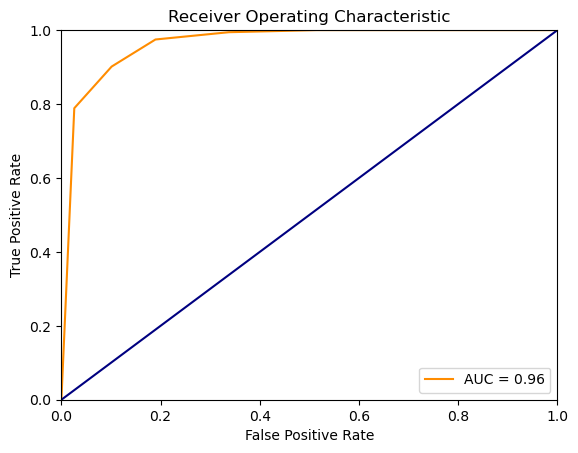

In [52]:
# Checking accuracy for K-Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5,p=1)
knn.fit(x_train, y_train)
predknn = knn.predict(x_test)
print("accuracy_score: \n", accuracy_score(y_test, predknn))
print("Classification Report for K-Neighbors Classifier: \n", classification_report(y_test, predknn))
print("Confusion Matrix of K-Neighbors Classifier: \n", confusion_matrix(y_test, predknn))
plot_roc_auc(y_test, knn.predict_proba(x_test)[:,1])

**Gradient Boosting Classifier**

accuracy_score: 
 0.9351351351351351
Classification Report for Gradient Boosting Classifier: 
               precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       385
         1.0       0.96      0.90      0.93       355

    accuracy                           0.94       740
   macro avg       0.94      0.93      0.93       740
weighted avg       0.94      0.94      0.93       740

Confusion Matrix of Gradient Boosting Classifier: 
 [[373  12]
 [ 36 319]]


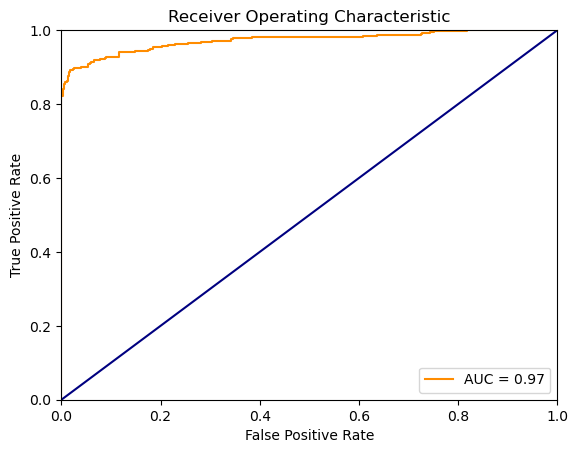

In [53]:
# Checking for accuracy for Gradient Boosting Classifier
Gb = GradientBoostingClassifier()
Gb.fit(x_train, y_train)
predGb = Gb.predict(x_test)
print("accuracy_score: \n", accuracy_score(y_test, predGb))
print("Classification Report for Gradient Boosting Classifier: \n", classification_report(y_test, predGb))
print("Confusion Matrix of Gradient Boosting Classifier: \n", confusion_matrix(y_test, predGb))
plot_roc_auc(y_test, Gb.predict_proba(x_test)[:,1])

**support Vector Machine(SVC) Classifier**

accuracy_score: 
 0.9027027027027027
Classification Report for support Vector Machine Classifier: 
               precision    recall  f1-score   support

         0.0       0.94      0.87      0.90       385
         1.0       0.87      0.94      0.90       355

    accuracy                           0.90       740
   macro avg       0.90      0.90      0.90       740
weighted avg       0.90      0.90      0.90       740

Confusion Matrix of support Vector Machine Classifier: 
 [[336  49]
 [ 23 332]]


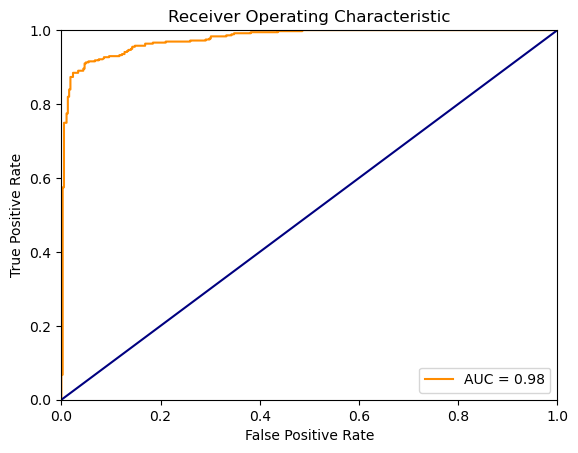

In [54]:
# Checking for accuracy for support Vector Machine Classifier
svc = SVC(probability=True)
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
decision_function_scores = svc.decision_function(x_test)
roc_auc = roc_auc_score(y_test, decision_function_scores)
print("accuracy_score: \n", accuracy_score(y_test, predsvc))
print("Classification Report for support Vector Machine Classifier: \n", classification_report(y_test, predsvc))
print("Confusion Matrix of support Vector Machine Classifier: \n", confusion_matrix(y_test, predsvc))
plot_roc_auc(y_test, svc.predict_proba(x_test)[:,1])

**Cross Validation Score**

In [55]:
# checking cv score for Random Forest classifier
score = cross_val_score(rfc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test, predrfc)- score.mean())

[0.85034014 0.86734694 0.85714286 0.8537415  0.86394558]
0.8585034013605443
Difference between Accuracy score and cross validation score is - 0.09284794999080714


In [56]:
# checking cv score for Extra Trees Clasifier
score = cross_val_score(Et,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test, predEt)- score.mean())

[0.8537415  0.84353741 0.86734694 0.84693878 0.86054422]
0.8544217687074831
Difference between Accuracy score and cross validation score is - 0.11719985291413848


In [57]:
# checking cv score for Logistic Regression
score = cross_val_score(lr,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test, predlr)- score.mean())

[0.88095238 0.86734694 0.86054422 0.8537415  0.86734694]
0.865986394557823
Difference between Accuracy score and cross validation score is - -0.09436477293620138


In [58]:
# checking cv score for Decision Tree Classifier
score = cross_val_score(dtree,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test, preddtree)- score.mean())

[0.79591837 0.76870748 0.79251701 0.7755102  0.79591837]
0.7857142857142858
Difference between Accuracy score and cross validation score is - 0.03590733590733586


In [59]:
# checking cv score for K-Neighbors Classifier
score = cross_val_score(knn,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test, predknn)- score.mean())

[0.83673469 0.85034014 0.84353741 0.84693878 0.85714286]
0.846938775510204
Difference between Accuracy score and cross validation score is - 0.04225041367898519


In [60]:
# checking cv score for Gradient Boosting Classifier
score = cross_val_score(Gb,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test, predGb)- score.mean())

[0.84693878 0.86394558 0.8707483  0.85034014 0.87414966]
0.8612244897959183
Difference between Accuracy score and cross validation score is - 0.07391064533921687


In [61]:
# checking cv score for Support Vector Machine Classifier
score = cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test, predsvc)- score.mean())

[0.85714286 0.84353741 0.87414966 0.85714286 0.88435374]
0.863265306122449
Difference between Accuracy score and cross validation score is - 0.03943739658025369


A higher cross-validation score generally indicates better model performance. Therefore, in this case, the "Extra Tree Classifier" has the highest cross-validation score 11%, making it the model with the best performance based on the outcome of the CV scores of each model.

Hence, The **Extra Tree Classifier** is our best model.

**Hyper Parameter Tuning**

In [62]:
# ExtraTree Classifier
parameters = {'criterion' :['gini', 'entropy'],
              'random_state' :[20, 50, 100],
              'max_depth' :[0, 20, 40],
              'n_jobs' : [-2, -1, 1],
              'n_estimators' : [50, 100,200, 300]}

In [63]:
GCV=GridSearchCV(ExtraTreesClassifier(), parameters, cv = 5)

In [64]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 20, 40],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1], 'random_state': [20, 50, 100]})

In [65]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 50}

In [66]:
Final_model = ExtraTreesClassifier(criterion = 'gini', max_depth = 40, n_estimators = 300, n_jobs = -2, random_state = 100)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

96.89189189189189


The ROC curve for the final model and the AUC value for the best model has 99% accuracy.

**Saving the Model**

In [67]:
# Saving the model using .pkl
joblib.dump(Final_model, "IBM_HR_Attrition_Rate_Analytics.pki")

['IBM_HR_Attrition_Rate_Analytics.pki']

**Predicting the saved model**

In [68]:
# loading the saved model and get the predictions
model = joblib.load("IBM_HR_Attrition_Rate_Analytics.pki")

# prediction
prediction = model.predict(x_test)
prediction

array([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 1.

These are the predicted Attrition values. 

In [69]:
a = np.array(y_test)
df = pd.DataFrame()
df["predicted"] = prediction
df["original"] = a
df

,predicted,original
0,0.0,0.0
1,0.0,0.0
2,1.0,1.0
3,0.0,0.0
4,0.0,0.0
...,...,...
735,0.0,0.0
736,0.0,0.0
737,0.0,0.0
738,0.0,0.0


In [70]:
modelname = ExtraTreesClassifier() 

In [71]:
# Training the model on the training data
modelname.fit(x_train, y_train)

ExtraTreesClassifier()

In [72]:
# Make predictions on the test data
predictions = modelname.predict(x_test)

In [73]:
conclusion = pd.DataFrame({'Predicted': predictions, 'Original': y_test})

In [74]:
# Creating a dictionary with the data
data = {
    'Predicted': modelname.predict(x_test),
    'Original': y_test
}

In [75]:
# Creating a DataFrame from the data dictionary
conclusion = pd.DataFrame(data)

In [76]:
# Creating a DataFrame with predicted and original values, using columns
conclusion = pd.DataFrame({'Predicted': predictions, 'Original': y_test})
print(conclusion)

      Predicted  Original
1303        0.0       0.0
509         0.0       0.0
1036        1.0       1.0
332         0.0       0.0
544         0.0       0.0
...         ...       ...
974         0.0       0.0
1118        0.0       0.0
862         0.0       0.0
1220        0.0       0.0
246         0.0       0.0

[740 rows x 2 columns]
